In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

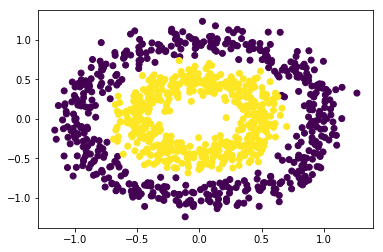

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(2, 100)
        self.layer2 = nn.Linear(100, 2)
        self.relu = nn.GELU()
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x
    
class Dataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.nSamples = len(X)
    def __len__(self):
        return self.nSamples
    def __getitem__(self, index):
        return self.X[index], self.y[index]   
    

In [5]:
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)
train_dataloader = DataLoader(train_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

In [6]:
net = Net()
optimizer = optim.Adam(net.parameters())
#optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
loss_fn = nn.MSELoss()
epochs = 1000
accuracy_list = []
for j in range(epochs):
    for i, data in enumerate(train_dataloader):
        net.train(True)
        a, b = data
        optimizer.zero_grad()
        y_pred = net(a.float())
        loss = loss_fn(y_pred, b)
        loss.backward()
        optimizer.step()
        net.train(False)
    output = net(torch.Tensor(X_test))
    y_pred = output.argmax(1)
    accuracy_list.append(accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (2) must match the size of tensor b (64) at non-singleton dimension 1

In [ ]:
plt.plot(accuracy_list)
plt.show()

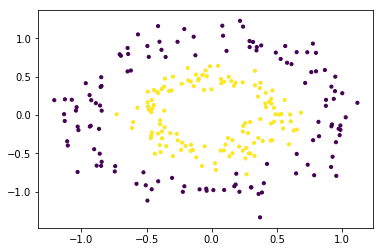

In [8]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10)
plt.show()

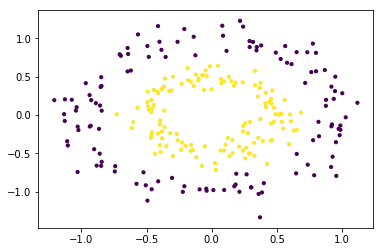

In [9]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=10)
plt.show()

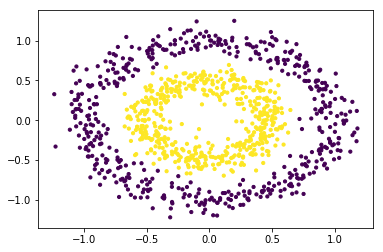

In [10]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
y_pred = net(torch.Tensor(X).float()).argmax(1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=10)
plt.show()

In [11]:
m = nn.Dropout(p=0.1)
input = torch.randn(5, 5)
output = m(input)
print(input, output)

tensor([[-0.1081, -0.8830, -0.0877,  2.4193, -0.0442],
        [ 0.9689,  0.7285, -0.0631, -0.4325,  0.4654],
        [-0.0964, -0.8480, -0.8046,  0.6911, -0.5060],
        [ 0.7202,  2.1211, -0.0634,  0.7970, -0.3967],
        [-0.1628,  0.6913,  0.1662, -0.5629, -0.9408]]) tensor([[-0.1201, -0.9812, -0.0974,  0.0000, -0.0492],
        [ 1.0766,  0.8095, -0.0701, -0.0000,  0.5171],
        [-0.1071, -0.9422, -0.8941,  0.7679, -0.5623],
        [ 0.8002,  2.3567, -0.0705,  0.8856, -0.4407],
        [-0.1809,  0.7681,  0.1847, -0.6254, -1.0453]])
